In [1]:
from pycaret.classification import *
from pycaret.time_series import *
import pandas as pd
import numpy as np
from pycaret.regression import predict_model
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from pycaret.regression import *

weather_data = pd.read_csv('weather_data.csv')

weather_data['Date_Time'] = pd.to_datetime(weather_data['Date_Time'])

# Create a sequence of numbers to represent the time series
weather_data['Series'] = np.arange(1, len(weather_data) + 1)

split_ratio = 0.8  # 80% training, 20% testing
split_index = int(len(weather_data) * split_ratio)

train = weather_data[:split_index]  
test = weather_data[split_index:]   

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

s = setup(
    data=train, 
    test_data=test, 
    target='Temperature_C', 
    fold_strategy='timeseries', 
    numeric_features=['Series', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh'], 
    fold=3, 
    transform_target=True, 
    data_split_shuffle=False,  
    fold_shuffle=False,       
    session_id=123
)

best = compare_models(sort='MAE')


Training set shape: (800000, 7)
Test set shape: (200000, 7)


,Description,Value
0,Session id,123
1,Target,Temperature_C
2,Target type,Regression
3,Original data shape,"(1000000, 7)"
4,Transformed data shape,"(1000000, 18)"
5,Transformed train set shape,"(800000, 18)"
6,Transformed test set shape,"(200000, 18)"
7,Numeric features,4
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,12.5321,209.7076,14.4813,-0.0003,0.9155,8.7141,4.4900
lightgbm,Light Gradient Boosting Machine,12.5499,210.6068,14.5123,-0.0046,0.9092,8.1414,3.0200
ridge,Ridge Regression,12.5518,210.7226,14.5163,-0.0052,0.9053,8.0342,3.1733
lar,Least Angle Regression,12.5518,210.7241,14.5163,-0.0052,0.9053,8.0331,1.5133
br,Bayesian Ridge,12.5518,210.7196,14.5162,-0.0051,0.9052,8.0342,2.0633
lr,Linear Regression,12.5518,210.7226,14.5163,-0.0052,0.9053,8.0342,3.5333
dummy,Dummy Regressor,12.5602,211.1185,14.5299,-0.0070,0.9048,8.1309,1.6400
en,Elastic Net,12.5619,211.2044,14.5329,-0.0075,0.9045,8.1143,2.2567
llar,Lasso Least Angle Regression,12.5619,211.2044,14.5329,-0.0075,0.9045,8.1143,1.7600
lasso,Lasso Regression,12.5619,211.2044,14.5329,-0.0075,0.9045,8.1143,3.0233


In [3]:
tuned_model = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.5503,210.0454,14.4929,-0.0003,0.9183,7.2909
1,12.5163,209.3696,14.4696,-0.0000,0.9168,8.0271
2,12.5264,209.5865,14.4771,-0.0001,0.9143,10.9525
Mean,12.5310,209.6672,14.4799,-0.0001,0.9165,8.7568
Std,0.0142,0.2817,0.0097,0.0001,0.0016,1.5814


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [4]:
# Step 1: Create a new DataFrame for the next 30 days
last_series_value = weather_data['Series'].max()
future_data = pd.DataFrame({
    'Series': np.arange(last_series_value + 1, last_series_value + 31),
    'Humidity_pct': [weather_data['Humidity_pct'].mean()] * 30,  
    'Precipitation_mm': [weather_data['Precipitation_mm'].mean()] * 30,  
    'Wind_Speed_kmh': [weather_data['Wind_Speed_kmh'].mean()] * 30, 
    'Location': ['Placeholder'] * 30, 
    'Date_Time': pd.date_range(start=weather_data['Date_Time'].max(), periods=30, freq='D')  # Generate next 30 days
})

future_forecast = predict_model(tuned_model, data=future_data)

print(future_forecast.columns) 

print(future_forecast.head())



Index(['Series', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh',
       'Location', 'Date_Time', 'prediction_label'],
      dtype='object')
    Series  Humidity_pct  Precipitation_mm  Wind_Speed_kmh     Location  \
0  1000001     60.021828          5.109639       14.997598  Placeholder   
1  1000002     60.021828          5.109639       14.997598  Placeholder   
2  1000003     60.021828          5.109639       14.997598  Placeholder   
3  1000004     60.021828          5.109639       14.997598  Placeholder   
4  1000005     60.021828          5.109639       14.997598  Placeholder   

            Date_Time  prediction_label  
0 2024-05-18 19:44:10         14.868182  
1 2024-05-19 19:44:10         14.868240  
2 2024-05-20 19:44:10         14.868299  
3 2024-05-21 19:44:10         14.868357  
4 2024-05-22 19:44:10         14.868415  


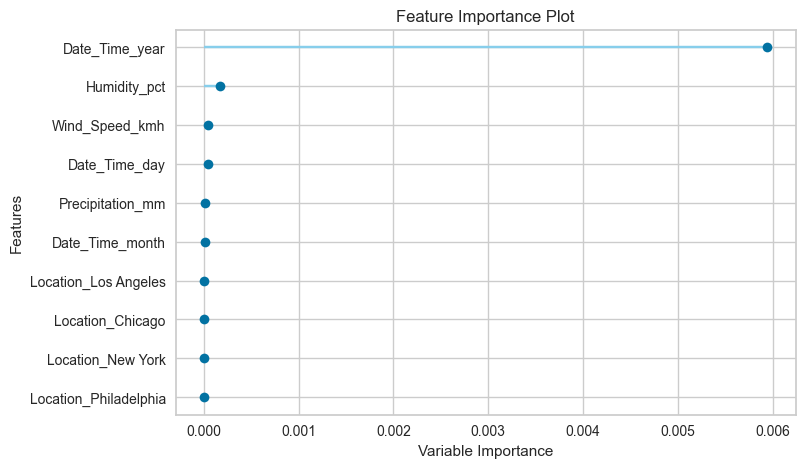

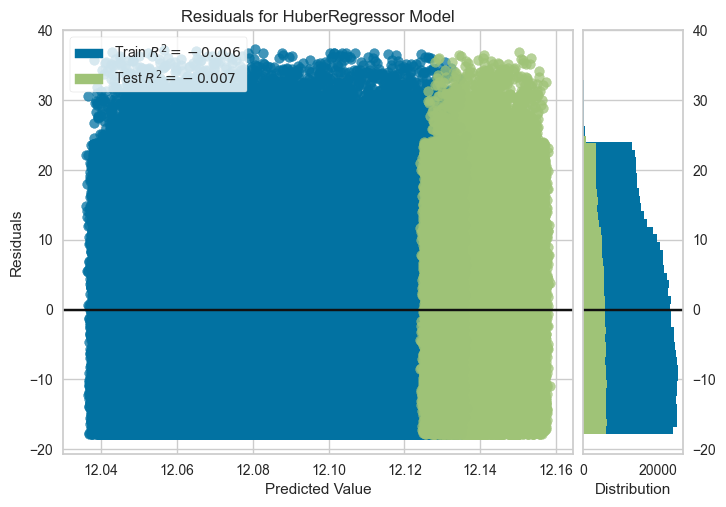

In [5]:
plot_model(tuned_model, plot='feature')

plot_model(tuned_model, plot='residuals')
